In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("movies.csv")

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,NaN,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,NaN,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,NaN,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,NaN,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,NaN,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,NaN,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,NaN,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,NaN,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  0 non-null      float64
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 898.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released    7668
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
df['score']   = df['score'].fillna(df['score'].median())
df['votes']   = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['released'] = df['released'].fillna('Unknown')
df['writer']  = df['writer'].fillna(df['writer'].mode().iloc[0])
df['star']    = df['star'].fillna(df['star'].mode().iloc[0])
df['country'] = df['country'].fillna(df['country'].mode().iloc[0])
df['company'] = df['company'].fillna('Missing')
df['gross']   = df['gross'].fillna(df['gross'].median())
df['budget']  = df['budget'].fillna(df['budget'].median())
df['rating']  = df['rating'].fillna(df['rating'].mode().iloc[0])

<Axes: xlabel='year', ylabel='Count'>

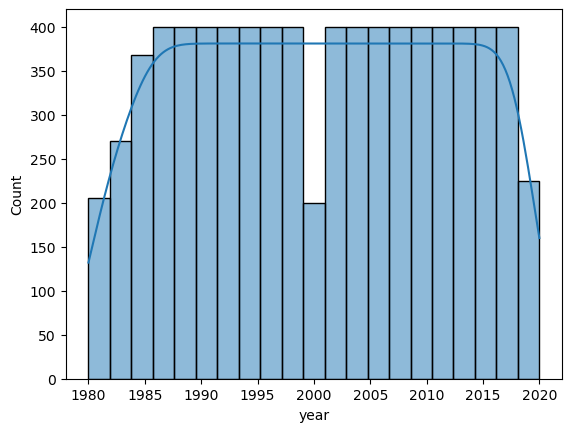

In [9]:
sns.histplot(x="year",data=df,kde=True)

In [10]:
df['score'].skew()


-0.6046792981982723

<Axes: xlabel='year'>

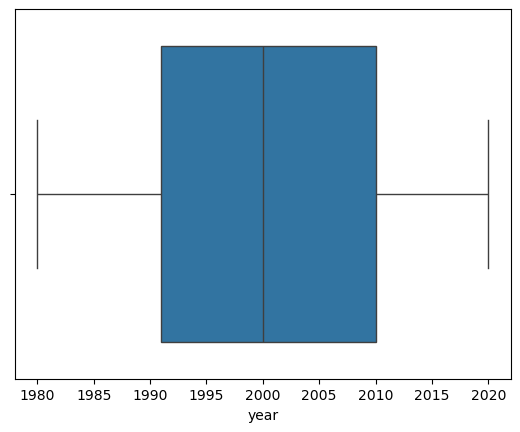

In [11]:
sns.boxplot(x="year",data=df)

Text(0, 0.5, 'NO OF MOVIES')

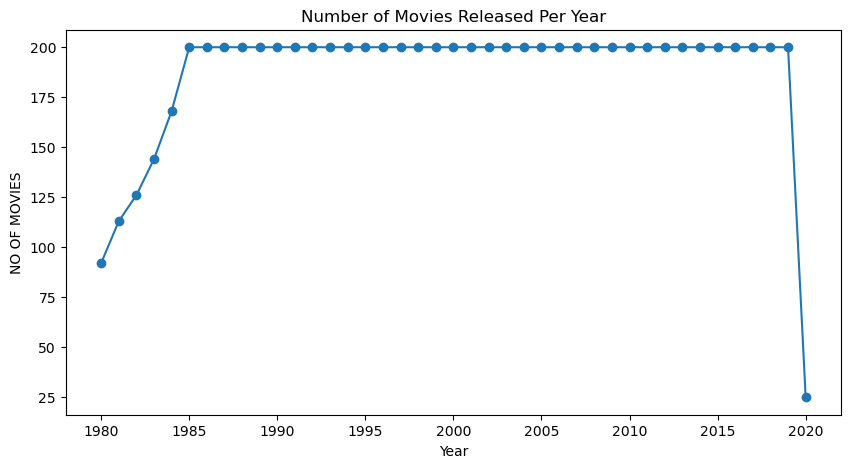

In [12]:
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
year_counts.plot(kind='line', marker='o')
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("NO OF MOVIES")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'Not Rated'),
  Text(4, 0, 'NC-17'),
  Text(5, 0, 'Approved'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'PG-13'),
  Text(8, 0, 'Unrated'),
  Text(9, 0, 'X'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'TV-14')])

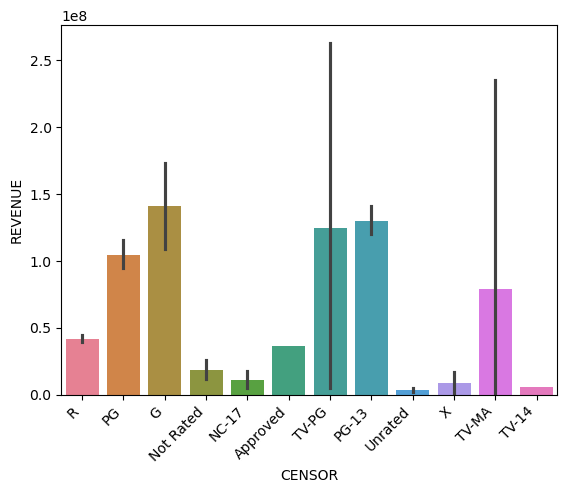

In [13]:
sns.barplot(x="rating",y="gross",hue="rating" ,data=df)
plt.xlabel("CENSOR")
plt.ylabel("REVENUE")
plt.xticks(rotation=45, ha='right')

sns.barplot(x="rating",y="gross",data=df,estimator=sum)
plt.xlabel("NEW X_AXIS")
plt.ylabel("NEW Y_AXIS")
plt.title("BAR CHART USING SEABORN")
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'Not Rated'),
  Text(4, 0, 'NC-17'),
  Text(5, 0, 'Approved'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'PG-13'),
  Text(8, 0, 'Unrated'),
  Text(9, 0, 'X'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'TV-14')])

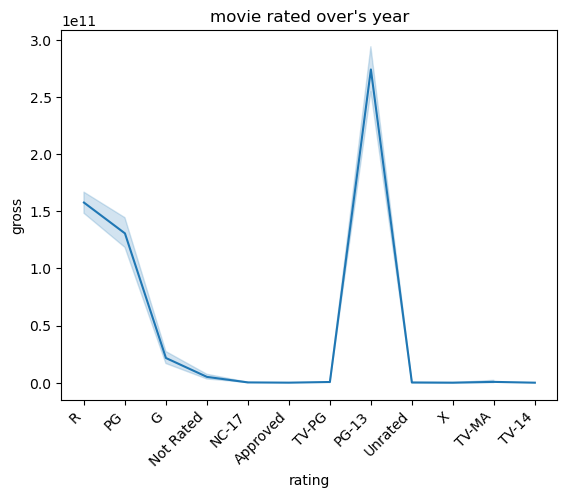

In [14]:
sns.lineplot(x="rating",y="gross",data=df,estimator=sum)
plt.xlabel("rating")
plt.title("movie rated over's year")
plt.xticks(rotation=45, ha='right')

In [15]:
#genre_counts = df['genre'].value_counts()

#plt.figure(figsize=(10, 8))
#genre_counts.plot.pie(
#   autopct='%1.1f%%',
#  startangle=130,
#    shadow=False,
#   title='Distribution of Movie Genres'
#)

#plt.ylabel('')
#plt.tight_layout()
#plt.show()

C:\Users\nirma\AppData\Local\Temp\ipykernel_23560\3950078156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')


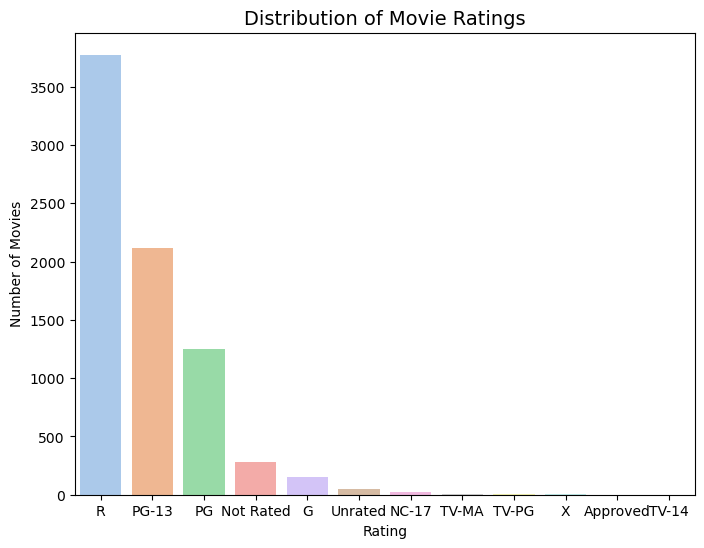

In [16]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Distribution of Movie Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


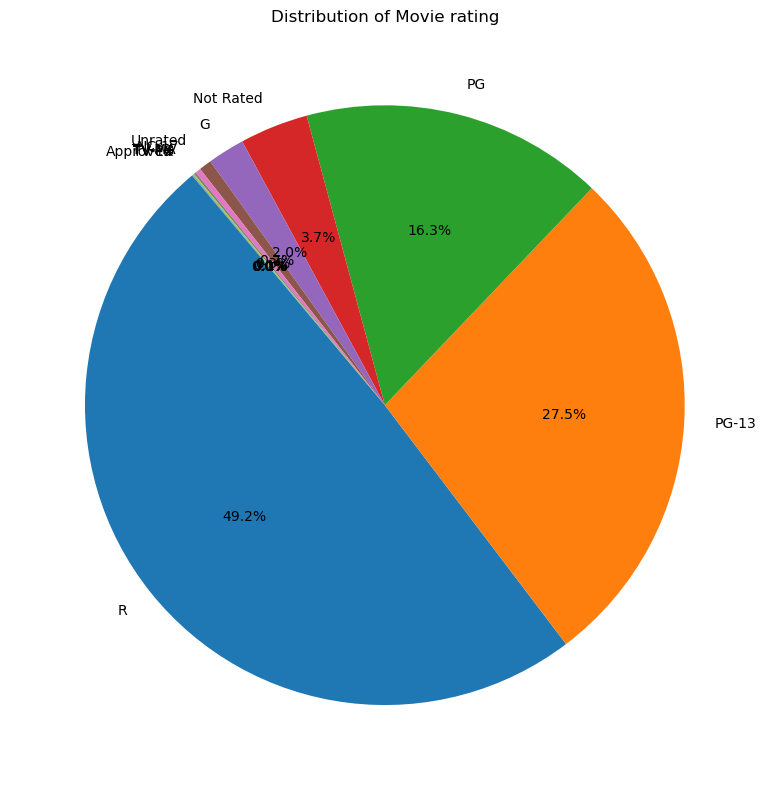

In [17]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 8))
rating_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=130,
    shadow=False,
    title='Distribution of Movie rating'
)

plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\nirma\AppData\Local\Temp\ipykernel_23560\3043764434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='star', y='gross', palette='viridis')


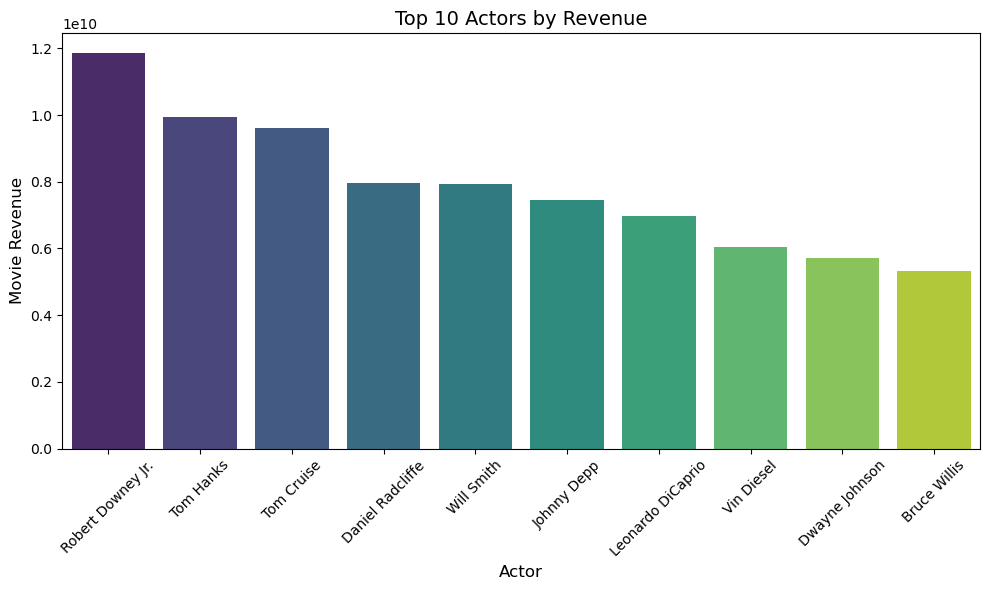

In [18]:

top_actors = df.groupby('star', as_index=False)['gross'].sum()
top_actors = top_actors.sort_values(by='gross', ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(data=top_actors, x='star', y='gross', palette='viridis')
plt.title("Top 10 Actors by Revenue", fontsize=14)
plt.xlabel("Actor", fontsize=12)
plt.ylabel("Movie Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


C:\Users\nirma\AppData\Local\Temp\ipykernel_23560\3104620655.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='name', y='gross', palette='viridis')


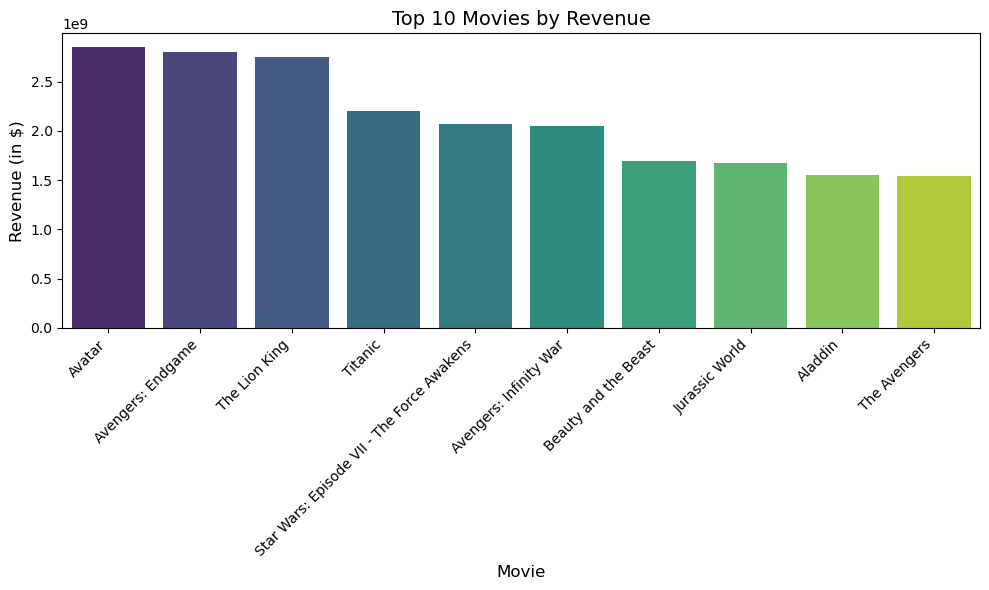

In [20]:
top_movies = (
    df.groupby('name', as_index=False)['gross']
      .sum()
      .sort_values(by='gross', ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='name', y='gross', palette='viridis')
plt.title("Top 10 Movies by Revenue", fontsize=14)
plt.xlabel("Movie", fontsize=12)
plt.ylabel("Revenue (in $)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


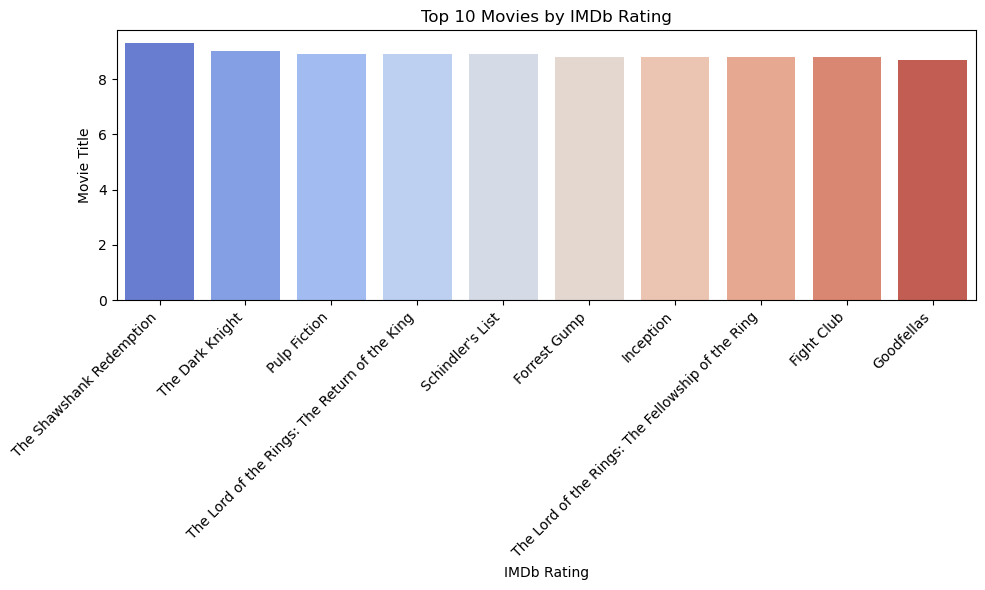

In [21]:
top10_rating = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='name', y='score', data=top10_rating, palette='coolwarm',hue="name")
plt.title("Top 10 Movies by IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,Unknown,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,Unknown,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,Unknown,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,Unknown,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,Unknown,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,Unknown,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Missing,90.000000
7664,Dream Round,R,Comedy,2020,Unknown,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,R,Drama,2020,Unknown,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,107.261613
7666,It's Just Us,R,Drama,2020,Unknown,6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Missing,120.000000


In [ ]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Movies Released Per Year")
plt.show()
